In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import seaborn as sns
import itertools
import math

!pip install pyproj
!pip install adjustText
!pip install scikit-learn

from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator

from scipy.stats import gaussian_kde
from scipy import stats
from scipy.stats import linregress
from scipy.stats import shapiro, ks_2samp, levene, ttest_ind, mannwhitneyu
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

from pyproj import Transformer

from adjustText import adjust_text

In [165]:
# Read  csvs
df = pd.read_csv("AvulsionAngles.csv")
df2 = pd.read_csv("Profiles.csv")
df3 = pd.read_csv("Fan Widths.csv")
df4 = pd.read_csv("Fan Morphometrics.csv")

In [166]:
# Ensure Fan columns are clean
df['Fan'] = df['Fan'].astype(str).str.strip()
df2['Fan'] = df2['Fan'].astype(str).str.strip()
df3['Fan'] = df3['Fan'].astype(str).str.strip()
df4['Fan'] = df4['Fan'].astype(str).str.strip()

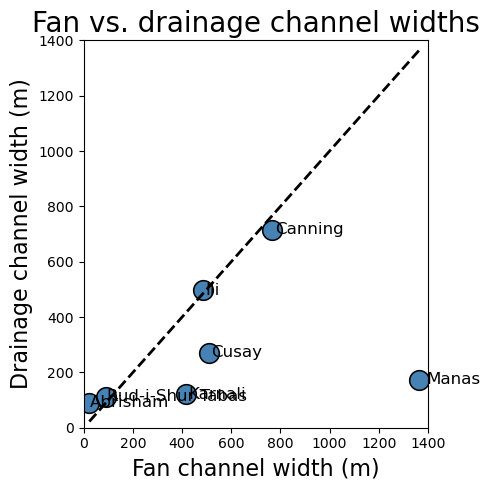

In [167]:
# -------------------------------
# Compute mean widths
# -------------------------------
drainage_cols = ['Drainage10', 'Drainage8', 'Drainage6', 'Drainage4', 'Drainage2']
fan_cols = ['Fan2', 'Fan4', 'Fan6', 'Fan8', 'Fan10']

df3['Mean_Drainage_Width'] = df3[drainage_cols].mean(axis=1, skipna=True)
df3['Mean_Fan_Width'] = df3[fan_cols].mean(axis=1, skipna=True)

# -------------------------------
# Plot settings
# -------------------------------
plt.figure(figsize=(5, 5))

sns.scatterplot(
    data=df3,
    x='Mean_Fan_Width',          # swapped axes
    y='Mean_Drainage_Width',     # swapped axes
    s=200,
    color='steelblue',
    edgecolor='k'
)

# Add 1:1 reference line
lims = [
    min(df3['Mean_Drainage_Width'].min(), df3['Mean_Fan_Width'].min()),
    max(df3['Mean_Drainage_Width'].max(), df3['Mean_Fan_Width'].max())
]
plt.plot(lims, lims, 'k--', lw=2)

# -------------------------------
# Add labels and formatting
# -------------------------------
for _, row in df3.iterrows():
    plt.text(row['Mean_Fan_Width'] * 1.02, row['Mean_Drainage_Width'], row['Fan'],
             fontsize=12, va='center')

plt.xlabel('Fan channel width (m)', fontsize=16)
plt.ylabel('Drainage channel width (m)', fontsize=16)
plt.title('Fan vs. drainage channel widths', fontsize=20)

plt.xlim(0, 1400)
plt.ylim(0, 1400)
plt.grid(False)
plt.tight_layout()
plt.show()


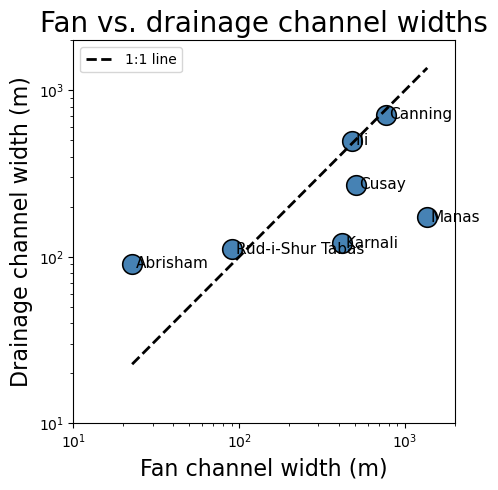

In [168]:
# -------------------------------
# Compute mean widths
# -------------------------------
drainage_cols = ['Drainage10', 'Drainage8', 'Drainage6', 'Drainage4', 'Drainage2']
fan_cols = ['Fan2', 'Fan4', 'Fan6', 'Fan8', 'Fan10']

df3['Mean_Drainage_Width'] = df3[drainage_cols].mean(axis=1, skipna=True)
df3['Mean_Fan_Width'] = df3[fan_cols].mean(axis=1, skipna=True)

# -------------------------------
# Plot settings
# -------------------------------
plt.figure(figsize=(5, 5))

sns.scatterplot(
    data=df3,
    x='Mean_Fan_Width',
    y='Mean_Drainage_Width',
    s=200,
    color='steelblue',
    edgecolor='k'
)

# Add 1:1 reference line (in log space)
lims = [
    min(df3['Mean_Drainage_Width'].min(), df3['Mean_Fan_Width'].min()),
    max(df3['Mean_Drainage_Width'].max(), df3['Mean_Fan_Width'].max())
]
plt.plot(lims, lims, 'k--', lw=2, label='1:1 line')

# -------------------------------
# Add labels and formatting
# -------------------------------
for _, row in df3.iterrows():
    plt.text(row['Mean_Fan_Width'] * 1.05, row['Mean_Drainage_Width'],
             row['Fan'], fontsize=11, va='center')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Fan channel width (m)', fontsize=16)
plt.ylabel('Drainage channel width (m)', fontsize=16)
plt.title('Fan vs. drainage channel widths', fontsize=20)

# Axis limits (log scale handles wide range automatically)
plt.xlim(10, 2000)
plt.ylim(10, 2000)

plt.grid(False)
plt.legend(fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()


In [169]:
# Initialize df5
df5 = pd.DataFrame({'Fan': fans})

columns = [
    'Mean avulsion angle',
    'Mean apex angle',
    'Fan gradient',
    'Drainage gradient',
    'Gradient change at apex',
    'Channel width change at apex',
    'Fan channel length',
    'Fan length',
    'Sinuosity',
    'Elevation change'
]

for col in columns:
    df5[col] = np.nan

In [170]:
# Step 1: Mean angles (Apex, Downfan, Overall)

# Mean avulsion angle (all angles per fan)
mean_avulsion = df.groupby('Fan')['Angle'].mean()

# Mean apex angle (where Apex == 'Yes')
mean_apex = df[df['Apex'] == 'Yes'].groupby('Fan')['Angle'].mean()

# Mean downfan angle (where Apex == 'No')
mean_downfan = df[df['Apex'] == 'No'].groupby('Fan')['Angle'].mean()

# Map into df5
df5['Mean avulsion angle'] = df5['Fan'].map(mean_avulsion)
df5['Mean apex angle'] = df5['Fan'].map(mean_apex)
df5['Mean downfan angle'] = df5['Fan'].map(mean_downfan)

# Check results
print(df5[['Fan', 'Mean avulsion angle', 'Mean apex angle', 'Mean downfan angle']])



          Fan         Mean avulsion angle  Mean apex angle  Mean downfan angle
0           Abrisham       70.486239          47.750000          71.352381    
1            Canning       33.750000          37.000000          32.666667    
2              Cusay       69.071429          36.500000          74.500000    
3                Ili       71.849711          50.000000          72.366864    
4            Karnali       41.000000          41.000000                NaN    
5               Kosi       40.000000          42.000000          39.333333    
6              Manas       34.333333          41.000000          21.000000    
7              Niger       69.744444          62.000000          69.831461    
8          Nomhon He       52.044444          36.250000          53.585366    
9           Okavango       83.634921          70.333333          84.300000    
10  Rud-i-Shur Tabas       48.333333          27.000000          49.400000    
11      Saskatchewan       69.294118          67.666

In [171]:
# Step 2: Whole gradients using RIVER ELEVATION
import numpy as np

fan_gradients = []
drainage_gradients = []
gradient_ratios = []

for fan_name in df5['Fan']:
    fan_df = df2[df2['Fan'] == fan_name].copy().sort_values('Distance').reset_index(drop=True)
    if fan_df.empty:
        drainage_gradients.append(np.nan)
        fan_gradients.append(np.nan)
        gradient_ratios.append(np.nan)
        continue

    # Find apex row
    apex_idx = fan_df[fan_df['Apex'] == 'Apex'].index
    if len(apex_idx) == 0:
        drainage_gradients.append(np.nan)
        fan_gradients.append(np.nan)
        gradient_ratios.append(np.nan)
        continue
    apex_idx = apex_idx[0]

    # Convert distance to meters
    fan_df['Distance_m'] = fan_df['Distance'] * 1000

    # Elevations (river)
    elev_start = fan_df.loc[0, 'River Elevation']
    elev_apex  = fan_df.loc[apex_idx, 'River Elevation']
    elev_end   = fan_df.loc[len(fan_df) - 1, 'River Elevation']

    # Distances (m)
    dist_start = fan_df.loc[0, 'Distance_m']
    dist_apex  = fan_df.loc[apex_idx, 'Distance_m']
    dist_end   = fan_df.loc[len(fan_df) - 1, 'Distance_m']

    # --- Drainage gradient (start → apex, includes apex row)
    elev_diff_drain = abs(elev_start - elev_apex)
    dist_diff_drain = abs(dist_apex - dist_start)
    drainage_grad = np.degrees(np.arctan(elev_diff_drain / dist_diff_drain)) if dist_diff_drain != 0 else np.nan

    # --- Fan gradient (after apex → end)
    if apex_idx < len(fan_df) - 1:
        elev_diff_fan = abs(elev_apex - elev_end)
        dist_diff_fan = abs(dist_end - dist_apex)
        fan_grad = np.degrees(np.arctan(elev_diff_fan / dist_diff_fan)) if dist_diff_fan != 0 else np.nan
    else:
        fan_grad = np.nan

    # --- Ratio (Drainage / Fan)
    grad_ratio = drainage_grad / fan_grad if (fan_grad and not np.isnan(fan_grad) and fan_grad != 0) else np.nan

    # Store results
    drainage_gradients.append(drainage_grad)
    fan_gradients.append(fan_grad)
    gradient_ratios.append(grad_ratio)

# Add to df5
df5['Drainage gradient'] = drainage_gradients
df5['Fan gradient'] = fan_gradients
df5['Gradient change at apex'] = gradient_ratios

# Print results
print(df5[['Fan', 'Drainage gradient', 'Fan gradient', 'Gradient change at apex']])



          Fan         Drainage gradient  Fan gradient  Gradient change at apex
0           Abrisham      0.062521         0.031414            1.990207       
1            Canning      0.178509         0.160389            1.112975       
2              Cusay      3.096812         0.161223           19.208213       
3                Ili      0.019473         0.010727            1.815381       
4            Karnali      0.087780         0.055788            1.573457       
5               Kosi      0.348264         0.017595           19.793418       
6              Manas      0.255051         0.048938            5.211690       
7              Niger      0.004396         0.002472            1.778846       
8          Nomhon He      0.723286         0.506005            1.429403       
9           Okavango      0.010337         0.009672            1.068775       
10  Rud-i-Shur Tabas      0.581335         0.428419            1.356933       
11      Saskatchewan      0.007162         0.006671 

In [172]:
# Step 3: Channel width metrics

# Define which columns represent drainage and fan widths
drainage_cols = ['Drainage10', 'Drainage8', 'Drainage6', 'Drainage4', 'Drainage2']
fan_cols = ['Fan2', 'Fan4', 'Fan6', 'Fan8', 'Fan10']

# Compute mean channel widths in df3
df3['Drainage Channel Width'] = df3[drainage_cols].mean(axis=1, skipna=True)
df3['Fan Channel Width'] = df3[fan_cols].mean(axis=1, skipna=True)

# Compute width change ratio (Fan / Drainage)
df3['Channel Width Change at Apex'] = df3['Fan Channel Width'] / df3['Drainage Channel Width']

# --- Clean df5 before adding new data ---
cols_to_drop = [
    'Mean drainage width',
    'Mean fan width',
    'Drainage Channel Width',
    'Fan Channel Width',
    'Channel Width Change at Apex'
]
df5 = df5.drop(columns=[c for c in cols_to_drop if c in df5.columns])

# Map the three clean columns into df5
width_metrics = df3.set_index('Fan')[[
    'Drainage Channel Width',
    'Fan Channel Width',
    'Channel Width Change at Apex'
]]
df5 = df5.merge(width_metrics, on='Fan', how='left')

# Check results
print(df5[['Fan', 'Drainage Channel Width', 'Fan Channel Width', 'Channel Width Change at Apex']])


          Fan         Drainage Channel Width  Fan Channel Width  Channel Width Change at Apex
0           Abrisham            90.8                 22.6                  0.248899          
1            Canning           716.0                764.6                  1.067877          
2              Cusay           270.2                507.6                  1.878608          
3                Ili           497.4                483.0                  0.971049          
4            Karnali           120.2                417.2                  3.470882          
5               Kosi             NaN                  NaN                       NaN          
6              Manas           173.0               1365.2                  7.891329          
7              Niger             NaN                  NaN                       NaN          
8          Nomhon He             NaN                  NaN                       NaN          
9           Okavango             NaN                  NaN   

In [173]:
# Step 4: Fan channel length (df2) and sinuosity (df4['Fan length'])

fan_channel_lengths = []
sinuosities = []

for fan_name in df5['Fan']:
    fan_df = df2[df2['Fan'] == fan_name].copy().sort_values('Distance').reset_index(drop=True)
    if fan_df.empty:
        fan_channel_lengths.append(np.nan)
        sinuosities.append(np.nan)
        continue

    # Find apex row
    apex_idx = fan_df[fan_df['Apex'] == 'Apex'].index
    if len(apex_idx) == 0:
        fan_channel_lengths.append(np.nan)
        sinuosities.append(np.nan)
        continue
    apex_idx = apex_idx[0]

    # Distances (in km)
    dist_apex = fan_df.loc[apex_idx, 'Distance']
    dist_end  = fan_df['Distance'].max()

    # 1️⃣ Fan channel length (apex → end)
    fan_channel_len = abs(dist_end - dist_apex)

    # 2️⃣ Get fan length from df4
    try:
        fan_len = df4.loc[df4['Fan'] == fan_name, 'Fan length'].values[0]
    except IndexError:
        fan_len = np.nan

    # 3️⃣ Sinuosity (channel / straight)
    sinuosity = fan_channel_len / fan_len if (fan_len and not np.isnan(fan_len) and fan_len != 0) else np.nan

    fan_channel_lengths.append(fan_channel_len)
    sinuosities.append(sinuosity)

# Add to df5
df5['Fan channel length'] = fan_channel_lengths
df5['Sinuosity'] = sinuosities

# Also map in Fan length from df4
df5['Fan length'] = df5['Fan'].map(df4.set_index('Fan')['Fan length'])

# Print check
print(df5[['Fan', 'Fan channel length', 'Fan length', 'Sinuosity']])



          Fan         Fan channel length  Fan length  Sinuosity
0           Abrisham           45            36.39    1.236603 
1            Canning           39            33.85    1.152142 
2              Cusay          113            77.41    1.459760 
3                Ili          266           191.59    1.388381 
4            Karnali           57            43.96    1.296633 
5               Kosi          270           146.89    1.838110 
6              Manas           80            60.59    1.320350 
7              Niger          370              NaN         NaN 
8          Nomhon He           42            38.53    1.090060 
9           Okavango          269           163.52    1.645059 
10  Rud-i-Shur Tabas           36            33.30    1.081081 
11      Saskatchewan           73            56.43    1.293638 
12             Shire           72            43.69    1.647974 


In [174]:
# -------------------------------
# Step 5: Elevation changes (Drainage and Fan)
# -------------------------------
drainage_elev_changes = []
fan_elev_changes = []
total_elev_changes = []

for fan_name in df5['Fan']:
    fan_df = df2[df2['Fan'] == fan_name].copy().sort_values('Distance').reset_index(drop=True)
    if fan_df.empty:
        drainage_elev_changes.append(np.nan)
        fan_elev_changes.append(np.nan)
        total_elev_changes.append(np.nan)
        continue

    # --- Find apex row ---
    apex_idx = fan_df[fan_df['Apex'] == 'Apex'].index
    if len(apex_idx) == 0:
        drainage_elev_changes.append(np.nan)
        fan_elev_changes.append(np.nan)
        total_elev_changes.append(np.nan)
        continue
    apex_idx = apex_idx[0]

    # --- River elevations ---
    elev_start = fan_df.loc[0, 'River Elevation']             # start of drainage (upstream)
    elev_apex = fan_df.loc[apex_idx, 'River Elevation']       # apex
    elev_toe  = fan_df.loc[len(fan_df) - 1, 'River Elevation']  # toe (end)

    # --- Elevation changes ---
    drainage_change = elev_start - elev_apex    # upstream to apex
    fan_change = elev_apex - elev_toe           # apex to toe
    total_change = elev_start - elev_toe        # overall start to end

    # Append results
    drainage_elev_changes.append(drainage_change)
    fan_elev_changes.append(fan_change)
    total_elev_changes.append(total_change)

# Add to df5
df5['Drainage elevation change'] = drainage_elev_changes
df5['Fan elevation change'] = fan_elev_changes
df5['Total elevation change'] = total_elev_changes

# Print check
print(df5[['Fan', 'Drainage elevation change', 'Fan elevation change', 'Total elevation change']])



          Fan         Drainage elevation change  Fan elevation change  Total elevation change
0           Abrisham           49.10360                24.672600               73.776200     
1            Canning          149.54770               109.173546              258.721246     
2              Cusay         1839.47660               317.969000             2157.445600     
3                Ili           52.00000                49.799600              101.799600     
4            Karnali          119.50000                55.500000              175.000000     
5               Kosi          820.58680                82.914100              903.500900     
6              Manas          378.37840                68.330730              446.709130     
7              Niger           15.50000                15.960400               31.460400     
8          Nomhon He          618.59500               370.931000              989.526000     
9           Okavango           52.50000                45.40

In [175]:
# -------------------------------
# Step 6: Number of Avulsion & Crevasse Nodes per Fan
# -------------------------------

# Count total nodes per fan
total_nodes = df.groupby('Fan').size()

# Count Crevasse and Avulsion nodes
crevasse_nodes = df[df['Crevasse'] == 'Yes'].groupby('Fan').size()
avulsion_nodes = df[df['Crevasse'] == 'No'].groupby('Fan').size()

# Map into df5
df5['Total nodes'] = df5['Fan'].map(total_nodes)
df5['Crevasse nodes'] = df5['Fan'].map(crevasse_nodes)
df5['Avulsion nodes'] = df5['Fan'].map(avulsion_nodes)

# Fill missing values with 0
df5[['Total nodes', 'Crevasse nodes', 'Avulsion nodes']] = (
    df5[['Total nodes', 'Crevasse nodes', 'Avulsion nodes']].fillna(0).astype(int)
)

# Compute Avulsion : Crevasse ratio
df5['Avulsion:Crevasse ratio'] = df5.apply(
    lambda row: row['Avulsion nodes'] / row['Crevasse nodes']
    if row['Crevasse nodes'] > 0 else np.nan,
    axis=1
)

# Print to check
print(df5[['Fan', 'Total nodes', 'Avulsion nodes', 'Crevasse nodes', 'Avulsion:Crevasse ratio']])


          Fan         Total nodes  Avulsion nodes  Crevasse nodes  Avulsion:Crevasse ratio
0           Abrisham      109             37             72               0.513889        
1            Canning        4              4              0                    NaN        
2              Cusay       14              7              7               1.000000        
3                Ili      173            108             65               1.661538        
4            Karnali        1              1              0                    NaN        
5               Kosi        4              4              0                    NaN        
6              Manas        3              3              0                    NaN        
7              Niger       90             59             31               1.903226        
8          Nomhon He       45             36              9               4.000000        
9           Okavango       63              8             55               0.145455        

In [176]:
# Save the summary table to a CSV file
output_path = "Fan_Summary_Table.csv"
df5.to_csv(output_path, index=False)

print(f"✅ df5 successfully saved as '{output_path}'")

✅ df5 successfully saved as 'Fan_Summary_Table.csv'


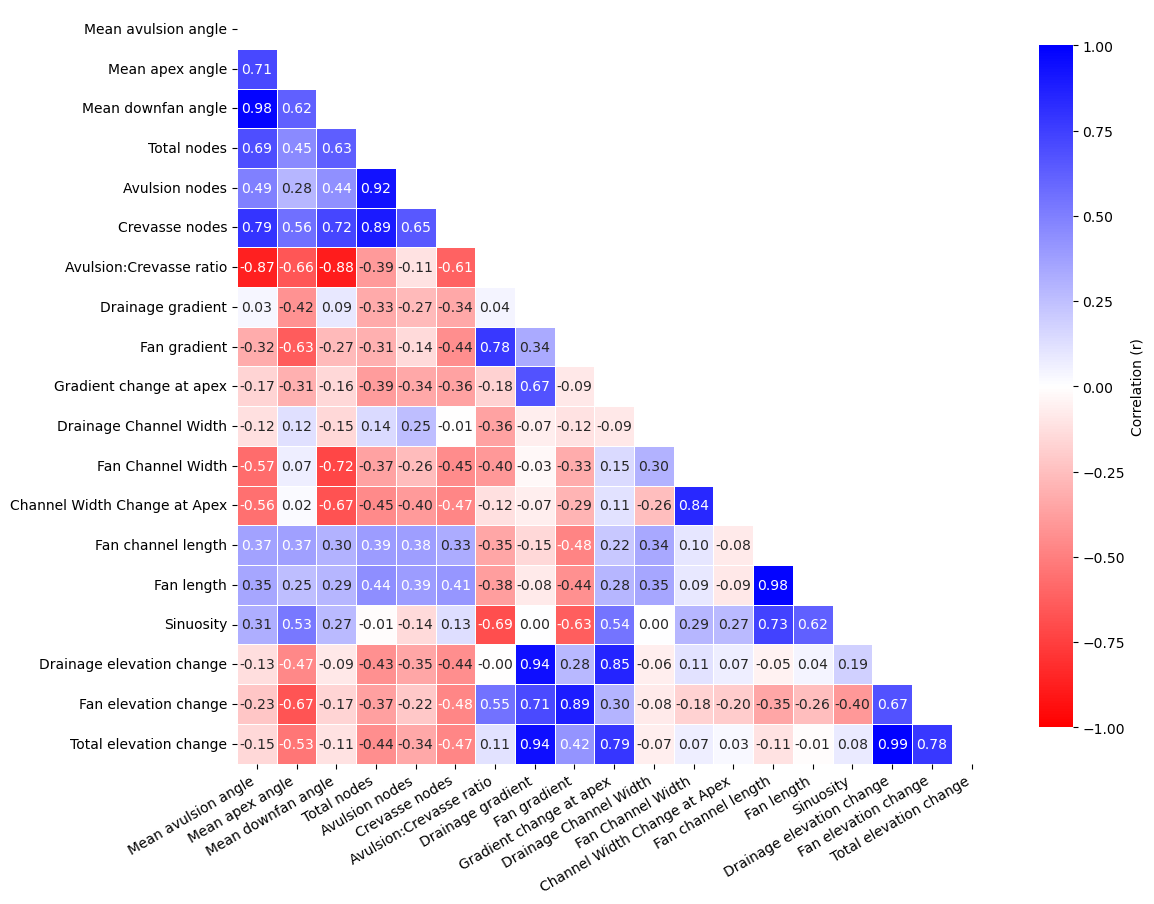

In [183]:
# Define the exact columns from Steps 1–5, in logical order
morphometric_order = [
    # Step 1 — Angles
    'Mean avulsion angle',
    'Mean apex angle',
    'Mean downfan angle',
    
     # Step 2 — Node counts
    'Total nodes',
    'Avulsion nodes',
    'Crevasse nodes',
    'Avulsion:Crevasse ratio',
    
    # Step 3 — Gradients
    'Drainage gradient',
    'Fan gradient',
    'Gradient change at apex',

    # Step 4 — Widths
    'Drainage Channel Width',
    'Fan Channel Width',
    'Channel Width Change at Apex',

    # Step 5 — Lengths & sinuosity
    'Fan channel length',
    'Fan length',
    'Sinuosity',

    # Step 6 — Elevation changes
    'Drainage elevation change',
    'Fan elevation change',
    'Total elevation change'
]

# Keep only columns that actually exist in df5
cols = [c for c in morphometric_order if c in df5.columns]
corr = df5[cols].corr()

# Mask upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="bwr_r",
    vmin=-1, vmax=1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlation (r)"}
)

plt.title("", fontsize=24, weight='bold', pad=20)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



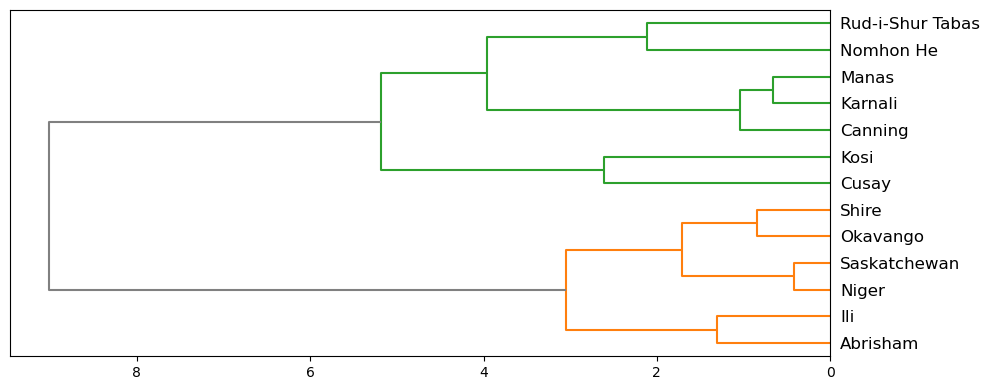


Cluster Assignments:
          Fan         Cluster
0           Abrisham     1   
3                Ili     1   
7              Niger     1   
9           Okavango     1   
11      Saskatchewan     1   
12             Shire     1   
1            Canning     2   
2              Cusay     2   
4            Karnali     2   
5               Kosi     2   
6              Manas     2   
8          Nomhon He     2   
10  Rud-i-Shur Tabas     2   


In [187]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

# ----------------------------------------
# Step 7: Hierarchical clustering (ignore NaNs)
# ----------------------------------------

# Variables for clustering
cluster_vars = [
    'Mean avulsion angle',
    'Mean apex angle',
    'Mean downfan angle',
    'Fan gradient',
    'Gradient change at apex',
    'Total nodes',
    'Avulsion:Crevasse ratio'
]

# Filter to variables that exist in df5
vars_exist = [v for v in cluster_vars if v in df5.columns]
X = df5[vars_exist].copy()
fan_labels = df5['Fan']

# Standardize available data columnwise (ignoring NaNs)
X_scaled = (X - X.mean()) / X.std()

# ----------------------------------------
# Compute distance matrix ignoring NaNs
# ----------------------------------------
def nan_euclidean(u, v):
    """Compute Euclidean distance ignoring NaNs."""
    mask = ~np.isnan(u) & ~np.isnan(v)
    if not np.any(mask):
        return np.nan
    return np.sqrt(np.sum((u[mask] - v[mask])**2))

# Compute pairwise distance matrix (NaN-tolerant)
dist_matrix = np.zeros((len(X_scaled), len(X_scaled)))
for i in range(len(X_scaled)):
    for j in range(i + 1, len(X_scaled)):
        dist = nan_euclidean(X_scaled.iloc[i].values, X_scaled.iloc[j].values)
        dist_matrix[i, j] = dist_matrix[j, i] = dist

# Replace NaNs in distance matrix with column means (if any remain)
col_means = np.nanmean(np.where(dist_matrix == 0, np.nan, dist_matrix), axis=0)
inds = np.where(np.isnan(dist_matrix))
dist_matrix[inds] = np.take(col_means, inds[1])

# Convert to condensed form for linkage
condensed = squareform(dist_matrix, checks=False)

# ----------------------------------------
# Perform hierarchical clustering
# ----------------------------------------
Z = linkage(condensed, method='ward')

# ----------------------------------------
# Plot dendrogram with improved styling
# ----------------------------------------
plt.figure(figsize=(10, 4))
dendrogram(
    Z,
    labels=fan_labels.values,
    leaf_rotation=0,          # keep labels horizontal
    leaf_font_size=12,
    orientation='left',       # tree grows from left → right, labels pinned left
    color_threshold=None,
    above_threshold_color='gray'
)

# Make branch lines thicker
for line in plt.gca().get_lines():
    line.set_linewidth(5)

plt.title('', fontsize=16, weight='bold', pad=20)
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.tight_layout()
plt.show()

# ----------------------------------------
# Assign clusters (example: 2 groups)
# ----------------------------------------
df5['Cluster'] = fcluster(Z, t=2, criterion='maxclust')

# Display cluster assignments
print("\nCluster Assignments:")
print(df5[['Fan', 'Cluster']].sort_values('Cluster'))
